### Name: Ahmed Mohiuddin Shah
### CMS ID: 415216
### Section: BSCS-12-A
### Lab: 13

# Pre Lab

In [41]:
import shap
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso

## Hands-On With Feature Engineering

### Imputation

In [42]:
# Example Dataset
data = {"Age": [25, None, 35, 29], "Salary": [50000, 54000, None, 58000]}
df = pd.DataFrame(data)
# Numerical Imputation with Mean
imputer = SimpleImputer(strategy="mean")
df["Age"] = imputer.fit_transform(df[["Age"]])
# Categorical Imputation (replace NaN with 'Unknown')
df["Salary"] = df["Salary"].fillna(df["Salary"].mean())
print(df)

         Age   Salary
0  25.000000  50000.0
1  29.666667  54000.0
2  35.000000  54000.0
3  29.000000  58000.0


### Encoding 

In [43]:
# Example Dataset
data = {"City": ["London", "Paris", "Berlin"]}
df = pd.DataFrame(data)
# One-Hot Encoding
one_hot = pd.get_dummies(df["City"])
# Label Encoding
le = LabelEncoder()
df["City_Label"] = le.fit_transform(df["City"])
print(one_hot)
print(df)

   Berlin  London  Paris
0   False    True  False
1   False   False   True
2    True   False  False
     City  City_Label
0  London           1
1   Paris           2
2  Berlin           0


### Feature Scaling 

In [44]:
# Example Dataset
data = {"Age": [25, 35, 29], "Salary": [50000, 54000, 58000]}
df = pd.DataFrame(data)
# Standardization
scaler = StandardScaler()
df[["Age", "Salary"]] = scaler.fit_transform(df[["Age", "Salary"]])
# Normalization
normalizer = MinMaxScaler()
df[["Age", "Salary"]] = normalizer.fit_transform(df[["Age", "Salary"]])
print(df)

   Age  Salary
0  0.0     0.0
1  1.0     0.5
2  0.4     1.0


### Creating Interaction Features 

In [45]:
# Example Dataset
data = {"Bedrooms": [3, 4, 2], "House_Size": [1000, 1200, 800]}
df = pd.DataFrame(data)
# Interaction Feature
df["Rooms_per_Square_Meter"] = df["Bedrooms"] / df["House_Size"]
print(df)

   Bedrooms  House_Size  Rooms_per_Square_Meter
0         3        1000                0.003000
1         4        1200                0.003333
2         2         800                0.002500


### Log Transformation 

In [46]:
# Example Dataset
data = {"Income": [1000, 10000, 50000, 100000]}
df = pd.DataFrame(data)
# Log Transformation
df["Log_Income"] = np.log1p(df["Income"])
print(df)

   Income  Log_Income
0    1000    6.908755
1   10000    9.210440
2   50000   10.819798
3  100000   11.512935


### Polynomial Features 

In [47]:
# Example Dataset
data = {"Feature": [2, 3, 4]}
df = pd.DataFrame(data)
# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
polynomial_features = poly.fit_transform(df[["Feature"]])
print(polynomial_features)

[[ 2.  4.]
 [ 3.  9.]
 [ 4. 16.]]


### Binning 

In [48]:
# Example Dataset
data = {"Age": [25, 35, 29, 50, 60]}
df = pd.DataFrame(data)
# Binning
bins = [0, 30, 50, 100]
labels = ["Young", "Middle-Aged", "Senior"]
df["Age_Group"] = pd.cut(df["Age"], bins=bins, labels=labels)
print(df)

   Age    Age_Group
0   25        Young
1   35  Middle-Aged
2   29        Young
3   50  Middle-Aged
4   60       Senior


## Hands-On With Feature Selection

### Correlation Analysis

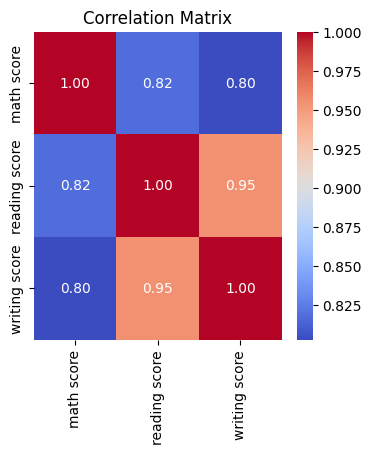

Highly correlated pairs (|correlation| > 0.85):
reading score - writing score: 0.95
writing score - reading score: 0.95


In [49]:
# Load dataset
data = pd.read_csv("data/student_perf/students_performance.csv")
# Filter numeric columns
numeric_data = data.select_dtypes(include=["number"])
# Compute correlation matrix
correlation_matrix = numeric_data.corr()
# Visualize the matrix
plt.figure(figsize=(4, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix") 
plt.show() 
# Drop features with high correlation (> 0.85) 
threshold = 0.85 
high_corr_pairs = [ 
(col1, col2) 
for col1 in correlation_matrix.columns 
for col2 in correlation_matrix.columns 
if abs(correlation_matrix[col1][col2]) > threshold and col1 != col2 
] 
# Output the highly correlated pairs 
print("Highly correlated pairs (|correlation| > 0.85):") 
for col1, col2 in high_corr_pairs: 
    print(f"{col1} - {col2}: {correlation_matrix[col1][col2]:.2f}") 

### Univariate Selection 

In [50]:
# Check column names 
print("Dataset columns:", data.columns) 
# Ensure 'passed_all' exists (modify this logic as per your requirement) 
if "passed_all" not in data.columns: 
# Example logic: Passed all exams if scores are >= 50 
    data["passed_all"] = (data["math score"] >= 50) & (data["reading score"] >= 50) & (data["writing score"] >= 50) 
# Encode categorical columns using one-hot encoding 
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 
'test preparation course']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
# Define features and target 
X = data_encoded.drop(columns=["passed_all"]) 
y = data_encoded["passed_all"] 
# Apply ANOVA F-test 
selector = SelectKBest(score_func=f_classif, k=5) 
X_selected = selector.fit_transform(X, y) 
# Display selected feature scores 
selected_features = X.columns[selector.get_support()] 
print("Selected Features:", list(selected_features))

Dataset columns: Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')
Selected Features: ['math score', 'reading score', 'writing score', 'lunch_standard', 'test preparation course_none']


### Recursive Feature Elimination (RFE) 

In [51]:
# Initialize model
model = RandomForestClassifier()
# Apply RFE
rfe_selector = RFE(estimator=model, n_features_to_select=5, step=1)
X_rfe = rfe_selector.fit_transform(X, y)
# Get selected features
selected_rfe_features = X.columns[rfe_selector.support_]
print("RFE Selected Features:", list(selected_rfe_features))

RFE Selected Features: ['math score', 'reading score', 'writing score', 'gender_male', 'lunch_standard']


### Feature Importance from Tree-Based Models 

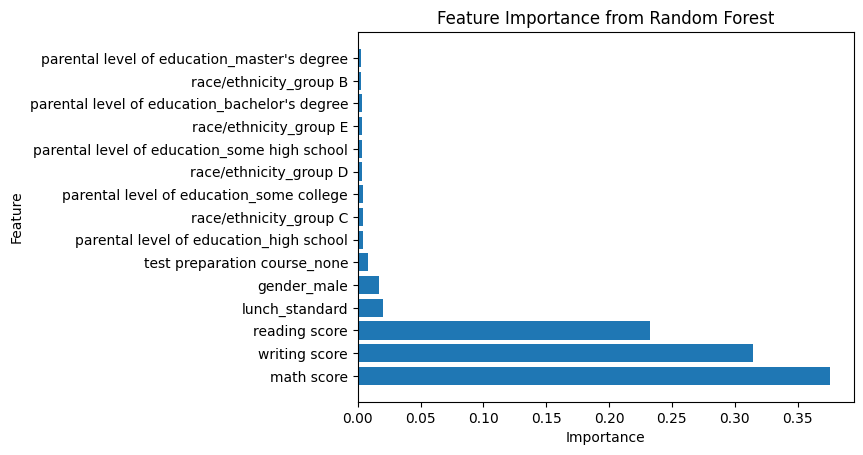

In [52]:
# Train Random Forest model
model = RandomForestClassifier()
model.fit(X, y)
# Plot feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.barh(X.columns[indices], importances[indices])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance from Random Forest")
plt.show()

### Regularization 

In [53]:
# Apply Lasso for feature selection
lasso = Lasso(alpha=0.01)
lasso.fit(X, y)
# Select features with non-zero coefficients
lasso_selector = SelectFromModel(lasso, prefit=True)
X_lasso = lasso_selector.transform(X)
# Get selected features
selected_lasso_features = X.columns[lasso_selector.get_support()]
print("Lasso Selected Features:", list(selected_lasso_features))

Lasso Selected Features: ['math score', 'writing score']


X has feature names, but SelectFromModel was fitted without feature names


## Visualizing Feature Importance 

### Bar Charts with Tree-Based Models 

In [54]:
# Train Random Forest
model = RandomForestClassifier()
model.fit(X, y)
# Get feature importances
importances = model.feature_importances_
features = X.columns
# Plot
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color="skyblue")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance (Random Forest)")
plt.show()

### SHAP Summary Plot 

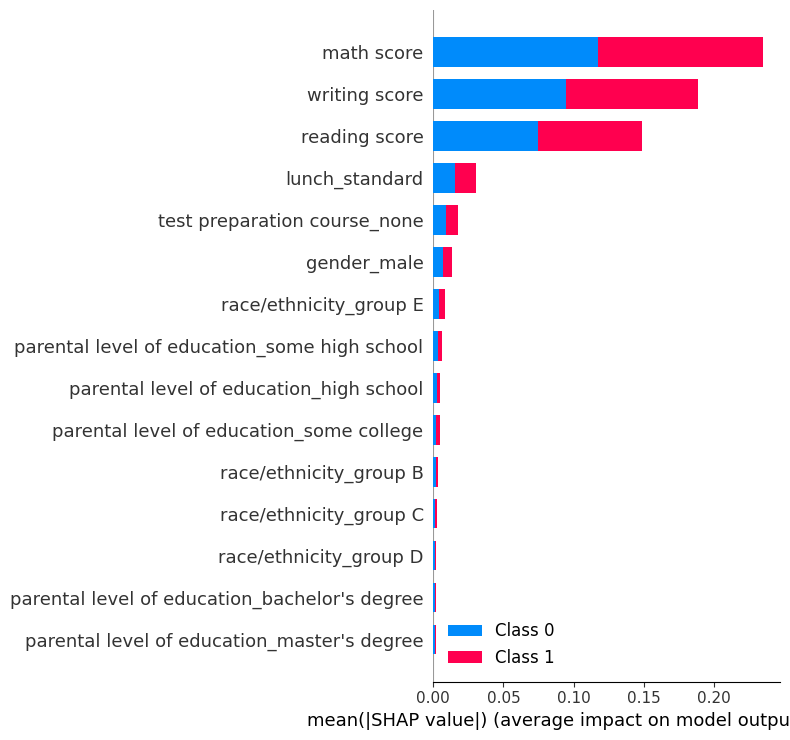

In [55]:
# Explain model predictions
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
# SHAP summary plot
shap.summary_plot(shap_values, X)

### Permutation Importance 

In [56]:
# Calculate permutation importance
perm_importance = permutation_importance(model, X, y, scoring="accuracy")
# Plot
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(
    features[sorted_idx],
    perm_importance.importances_mean[sorted_idx],
    color="lightcoral",
)
plt.xlabel("Permutation Importance")
plt.ylabel("Feature")
plt.title("Permutation Feature Importance")
plt.show()

# Mini Challenge

In [124]:
import kagglehub
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shap
import os

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

## Downloading the Dataset

In [58]:
# Download latest version
path = kagglehub.dataset_download("arunavakrchakraborty/australia-weather-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Ahmed Mohiuddin Shah\.cache\kagglehub\datasets\arunavakrchakraborty\australia-weather-data\versions\1


In [89]:
# check the files in the directory
os.listdir(path)

['Weather Test Data.csv', 'Weather Training Data.csv']

In [90]:
data_train = pd.read_csv(os.path.join(path, "Weather Training Data.csv"))

## Exploring Dataset

In [91]:
data_train.head()

row ID Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0   Row0   Albury     13.4     22.9       0.6          NaN       NaN   
1   Row1   Albury      7.4     25.1       0.0          NaN       NaN   
2   Row2   Albury     17.5     32.3       1.0          NaN       NaN   
3   Row3   Albury     14.6     29.7       0.2          NaN       NaN   
4   Row4   Albury      7.7     26.7       0.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2           W           41.0        ENE  ...        82.0         33.0   
3         WNW           56.0          W  ...        55.0         23.0   
4           W           35.0        SSE  ...        48.0         19.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1010.8       1006.0       7.0       8.0     17.8     29.7         No   
3       1009.2       1005.4       NaN       NaN     20.6     28.9         No   
4       1013.4       1010.1       NaN       NaN     16.3     25.5         No   

   RainTomorrow  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 23 columns]

In [92]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         99516 non-null  object 
 1   Location       99516 non-null  object 
 2   MinTemp        99073 non-null  float64
 3   MaxTemp        99286 non-null  float64
 4   Rainfall       98537 non-null  float64
 5   Evaporation    56985 non-null  float64
 6   Sunshine       52199 non-null  float64
 7   WindGustDir    92995 non-null  object 
 8   WindGustSpeed  93036 non-null  float64
 9   WindDir9am     92510 non-null  object 
 10  WindDir3pm     96868 non-null  object 
 11  WindSpeed9am   98581 non-null  float64
 12  WindSpeed3pm   97681 non-null  float64
 13  Humidity9am    98283 non-null  float64
 14  Humidity3pm    97010 non-null  float64
 15  Pressure9am    89768 non-null  float64
 16  Pressure3pm    89780 non-null  float64
 17  Cloud9am       61944 non-null  float64
 18  Cloud3

In [93]:
data_train.describe()

MinTemp       MaxTemp      Rainfall  Evaporation      Sunshine  \
count  99073.000000  99286.000000  98537.000000  56985.00000  52199.000000   
mean      12.176266     23.218513      2.353024      5.46132      7.615090   
std        6.390882      7.115072      8.487866      4.16249      3.783008   
min       -8.500000     -4.100000      0.000000      0.00000      0.000000   
25%        7.600000     17.900000      0.000000      2.60000      4.800000   
50%       12.000000     22.600000      0.000000      4.80000      8.400000   
75%       16.800000     28.200000      0.800000      7.40000     10.600000   
max       33.900000     48.100000    371.000000     86.20000     14.500000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   93036.000000  98581.000000  97681.000000  98283.000000  97010.000000   
mean       39.976966     14.004849     18.650464     68.866376     51.433296   
std        13.581524      8.902323      8.801827     19.074951     20.777616   
min         6.000000      0.000000      0.000000      0.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     70.000000     52.000000   
75%        48.000000     19.000000     24.000000     83.000000     65.000000   
max       135.000000    130.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  89768.000000  89780.000000  61944.000000  59514.000000  98902.000000   
mean    1017.684638   1015.286204      4.447985      4.519122     16.970041   
std        7.110166      7.045189      2.886580      2.716618      6.488961   
min      980.500000    978.200000      0.000000      0.000000     -7.000000   
25%     1013.000000   1010.500000      1.000000      2.000000     12.300000   
50%     1017.700000   1015.300000      5.000000      5.000000     16.700000   
75%     1022.400000   1020.000000      7.000000      7.000000     21.500000   
max     1041.000000   1039.600000      9.000000      9.000000     40.200000   

            Temp3pm  RainTomorrow  
count  97612.000000  99516.000000  
mean      21.681340      0.224677  
std        6.931681      0.417372  
min       -5.100000      0.000000  
25%       16.600000      0.000000  
50%       21.100000      0.000000  
75%       26.400000      0.000000  
max       46.700000      1.000000

In [94]:
data_train.shape

(99516, 23)

## Preproccessing Data

### Dropping Useless Columns

In [95]:
# dropping the column row ID
data_train.drop(columns=["row ID"], inplace=True)

### Handling Missing Values

In [96]:
# check for missing values
data_train.isnull().sum()

Location             0
MinTemp            443
MaxTemp            230
Rainfall           979
Evaporation      42531
Sunshine         47317
WindGustDir       6521
WindGustSpeed     6480
WindDir9am        7006
WindDir3pm        2648
WindSpeed9am       935
WindSpeed3pm      1835
Humidity9am       1233
Humidity3pm       2506
Pressure9am       9748
Pressure3pm       9736
Cloud9am         37572
Cloud3pm         40002
Temp9am            614
Temp3pm           1904
RainToday          979
RainTomorrow         0
dtype: int64

- Since a significant amoount of columns have missing values we need to do mean imputation.

In [97]:
imputer = SimpleImputer(strategy="median")

numerical_columns = data_train.select_dtypes(include=["number"]).columns
# exclude the target column
numerical_columns = numerical_columns.drop("RainTomorrow")

data_train[numerical_columns] = imputer.fit_transform(data_train[numerical_columns])

In [98]:
data_train.isnull().sum()

Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir      6521
WindGustSpeed       0
WindDir9am       7006
WindDir3pm       2648
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday         979
RainTomorrow        0
dtype: int64

In [99]:
data_train.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          4.8       8.4           W   
1   Albury      7.4     25.1       0.0          4.8       8.4         WNW   
2   Albury     17.5     32.3       1.0          4.8       8.4           W   
3   Albury     14.6     29.7       0.2          4.8       8.4         WNW   
4   Albury      7.7     26.7       0.0          4.8       8.4           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Humidity9am  Humidity3pm  \
0           44.0          W        WNW  ...         71.0         22.0   
1           44.0        NNW        WSW  ...         44.0         25.0   
2           41.0        ENE         NW  ...         82.0         33.0   
3           56.0          W          W  ...         55.0         23.0   
4           35.0        SSE          W  ...         48.0         19.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       5.0     16.9     21.8         No   
1       1010.6       1007.8       5.0       5.0     17.2     24.3         No   
2       1010.8       1006.0       7.0       8.0     17.8     29.7         No   
3       1009.2       1005.4       5.0       5.0     20.6     28.9         No   
4       1013.4       1010.1       5.0       5.0     16.3     25.5         No   

   RainTomorrow  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 22 columns]

In [100]:
# take categorical columns and exclude the target column and the RainToday column
categorical_columns = data_train.select_dtypes(include=["object"]).columns
categorical_columns = categorical_columns.drop(["RainToday"])

data_train[categorical_columns] = data_train[categorical_columns].fillna("Unknown")

data_train.isnull().sum()

Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir        0
WindGustSpeed      0
WindDir9am         0
WindDir3pm         0
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday        979
RainTomorrow       0
dtype: int64

In [101]:
# dealing with the RainToday column according to the ratio of Yes and No
data_train["RainToday"].value_counts()

RainToday
No     76481
Yes    22056
Name: count, dtype: int64

- Since there are more instances of No than Yes we will fill with yes

In [102]:
data_train["RainToday"] = data_train["RainToday"].fillna("No")

data_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

### Dropping Duplicate rows

In [103]:
# check for duplicate rows
data_train.duplicated().sum()

32

In [104]:
# drop duplicate rows except for the first occurrence
data_train.drop_duplicates(keep="first", inplace=True)

### Using Correlation Matrix

In [105]:
# correlation matrix
numeric_data = data_train.select_dtypes(include=["number"])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#### Creating Interaction Feature

- From matrix we can see we can make an interaction feature of AvgDayTemp by using MinTemp and MaxTemp

In [106]:
# Creating Interaction Feature from MinTemp and MaxTemp
AvgDayTemp = (data_train["MinTemp"] + data_train["MaxTemp"]) / 2
data_train["AvgDayTemp"] = AvgDayTemp
data_train["Wind_Interaction"] = data_train["WindGustSpeed"] * data_train["WindSpeed3pm"]

# Dropping MinTemp and MaxTemp
data_train.drop(columns=["MinTemp", "MaxTemp"], inplace=True)

#### Dropping Highly correlated features

In [107]:
# drop features with high correlation
threshold = 0.85

high_corr_pairs = [
    (col1, col2)
    for col1 in correlation_matrix.columns
    for col2 in correlation_matrix.columns
    if abs(correlation_matrix[col1][col2]) > threshold and col1 != col2
]

print("Highly correlated pairs (|correlation| > 0.85):")
for col1, col2 in high_corr_pairs:
    print(f"{col1} - {col2}: {correlation_matrix[col1][col2]:.2f}")

# drop the highly correlated columns
data_train.drop(columns=["Temp9am", "Temp3pm", "Pressure3pm"], inplace=True)

# check the columns
data_train.columns

Highly correlated pairs (|correlation| > 0.85):
MinTemp - Temp9am: 0.90
MaxTemp - Temp9am: 0.88
MaxTemp - Temp3pm: 0.97
Pressure9am - Pressure3pm: 0.96
Pressure3pm - Pressure9am: 0.96
Temp9am - MinTemp: 0.90
Temp9am - MaxTemp: 0.88
Temp3pm - MaxTemp: 0.97


Index(['Location', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Cloud9am',
       'Cloud3pm', 'RainToday', 'RainTomorrow', 'AvgDayTemp',
       'Wind_Interaction'],
      dtype='object')

### Linear plots

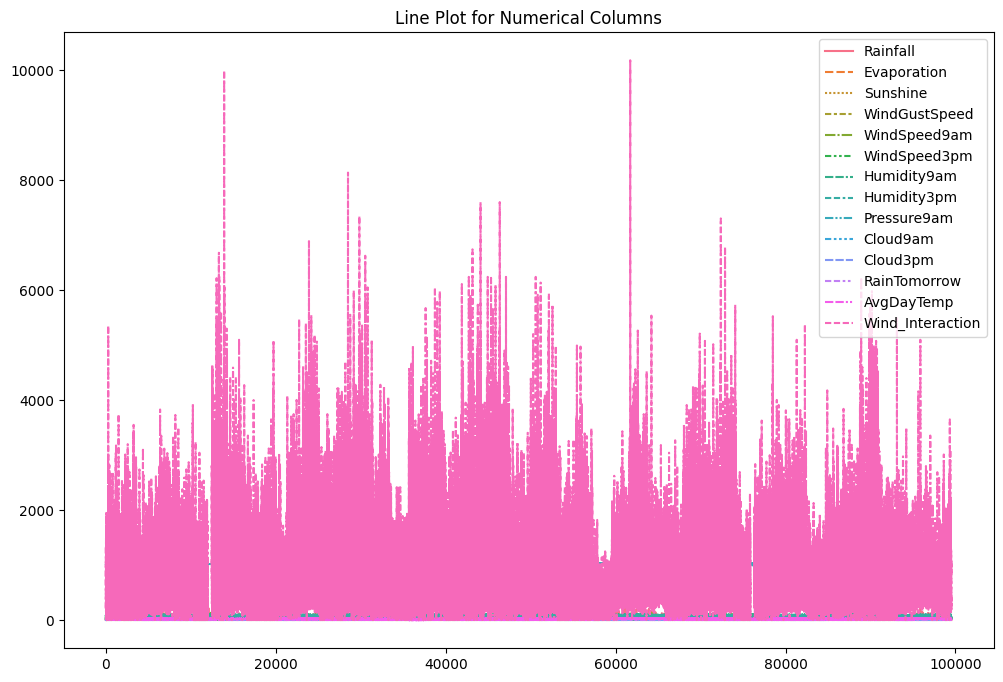

In [108]:
# line plots for numerical columns
numerical_columns = data_train.select_dtypes(include=["number"]).columns

plt.figure(figsize=(12, 8))
sns.lineplot(data=data_train[numerical_columns])
plt.title("Line Plot for Numerical Columns")
plt.show()

### Scatter Plots

<Figure size 1200x800 with 0 Axes>

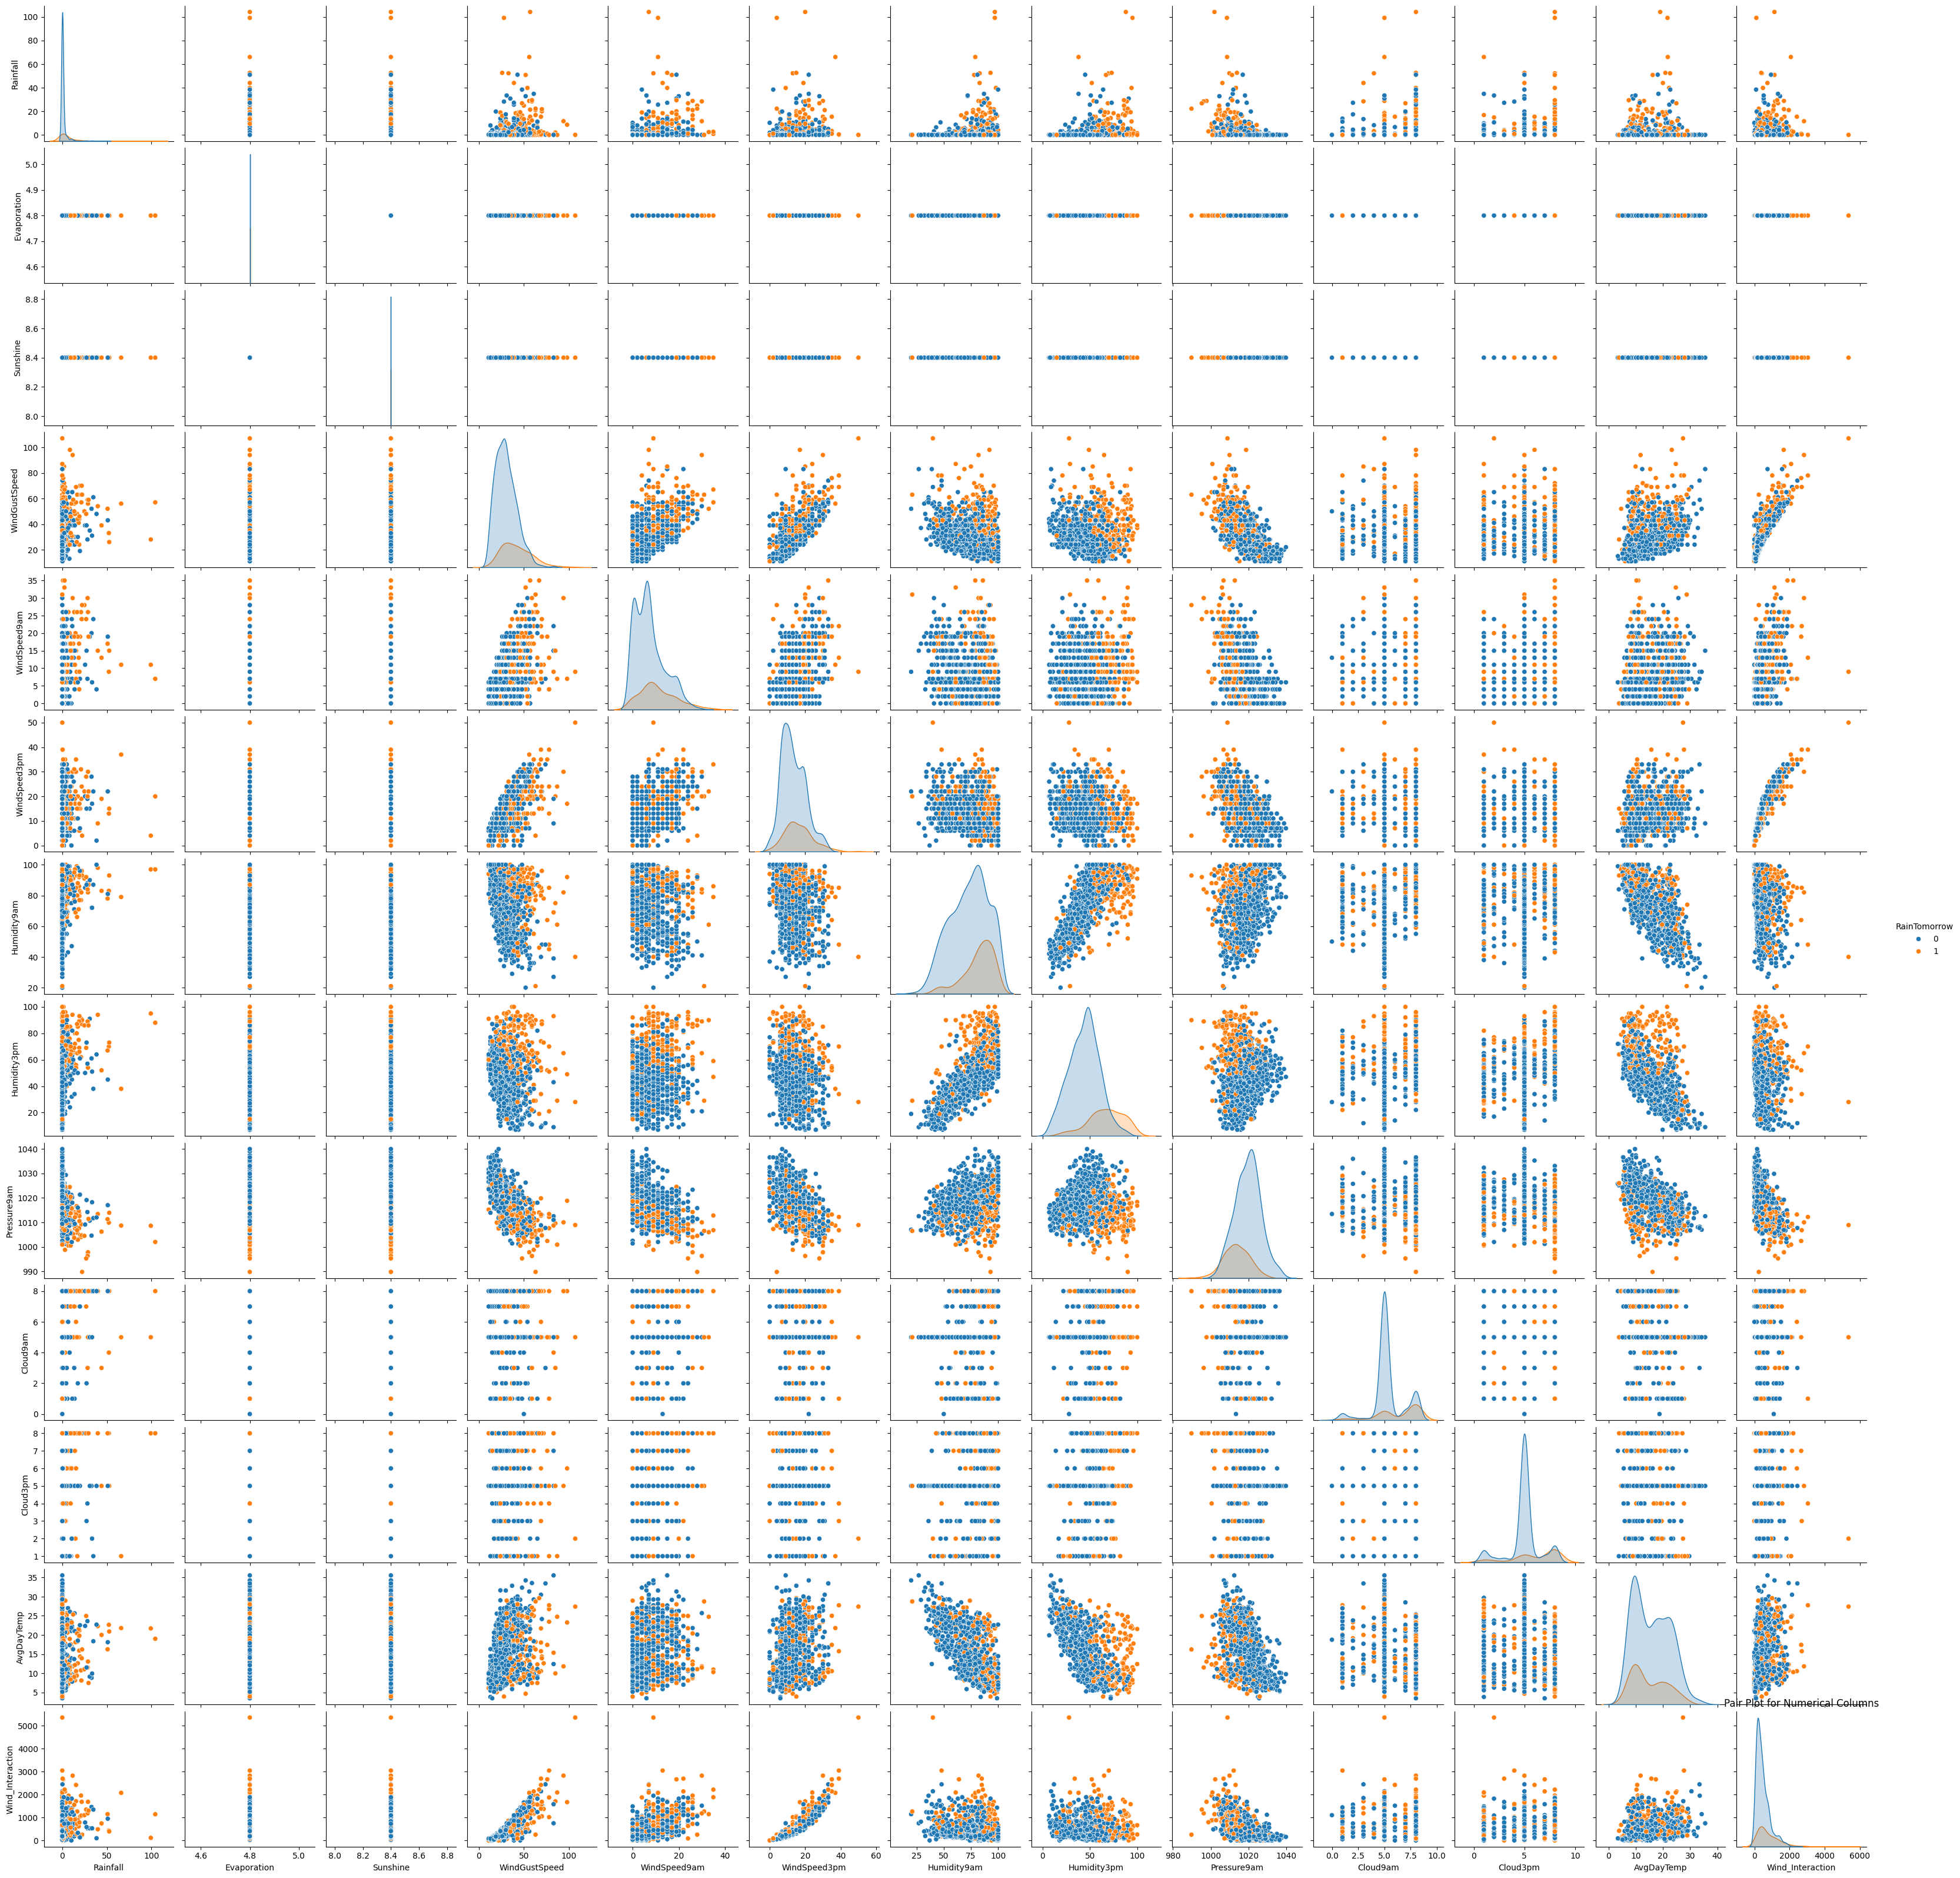

In [109]:
# Scatter plots for numerical columns with RainTomorrow as hue
plt.figure(figsize=(12, 8))
sns.pairplot(data_train[:1000], hue="RainTomorrow")
plt.title("Pair Plot for Numerical Columns")
plt.show()

### Encoding the catagorical columns

In [110]:
# Encoding categorical columns
categorical_columns = data_train.select_dtypes(include=["object"]).columns

data_encoded = pd.get_dummies(data_train, columns=categorical_columns, drop_first=True)

data_encoded.head()

Rainfall  Evaporation  Sunshine  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0       0.6          4.8       8.4           44.0          20.0          24.0   
1       0.0          4.8       8.4           44.0           4.0          22.0   
2       1.0          4.8       8.4           41.0           7.0          20.0   
3       0.2          4.8       8.4           56.0          19.0          24.0   
4       0.0          4.8       8.4           35.0           6.0          17.0   

   Humidity9am  Humidity3pm  Pressure9am  Cloud9am  ...  WindDir3pm_S  \
0         71.0         22.0       1007.7       8.0  ...         False   
1         44.0         25.0       1010.6       5.0  ...         False   
2         82.0         33.0       1010.8       7.0  ...         False   
3         55.0         23.0       1009.2       5.0  ...         False   
4         48.0         19.0       1013.4       5.0  ...         False   

   WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  \
0          False           False           False          False   
1          False           False           False          False   
2          False           False           False          False   
3          False           False           False          False   
4          False           False           False          False   

   WindDir3pm_Unknown  WindDir3pm_W  WindDir3pm_WNW  WindDir3pm_WSW  \
0               False         False            True           False   
1               False         False           False            True   
2               False         False           False           False   
3               False          True           False           False   
4               False          True           False           False   

   RainToday_Yes  
0          False  
1          False  
2          False  
3          False  
4          False  

[5 rows x 111 columns]

### Feature Selection using Random Forest Classifier

In [113]:
data_encoded_X = data_encoded.drop(columns=["RainTomorrow"])
data_encoded_y = data_encoded["RainTomorrow"]

# Train Random Forest model
model = RandomForestClassifier()
model.fit(data_encoded_X, data_encoded_y)

RandomForestClassifier()

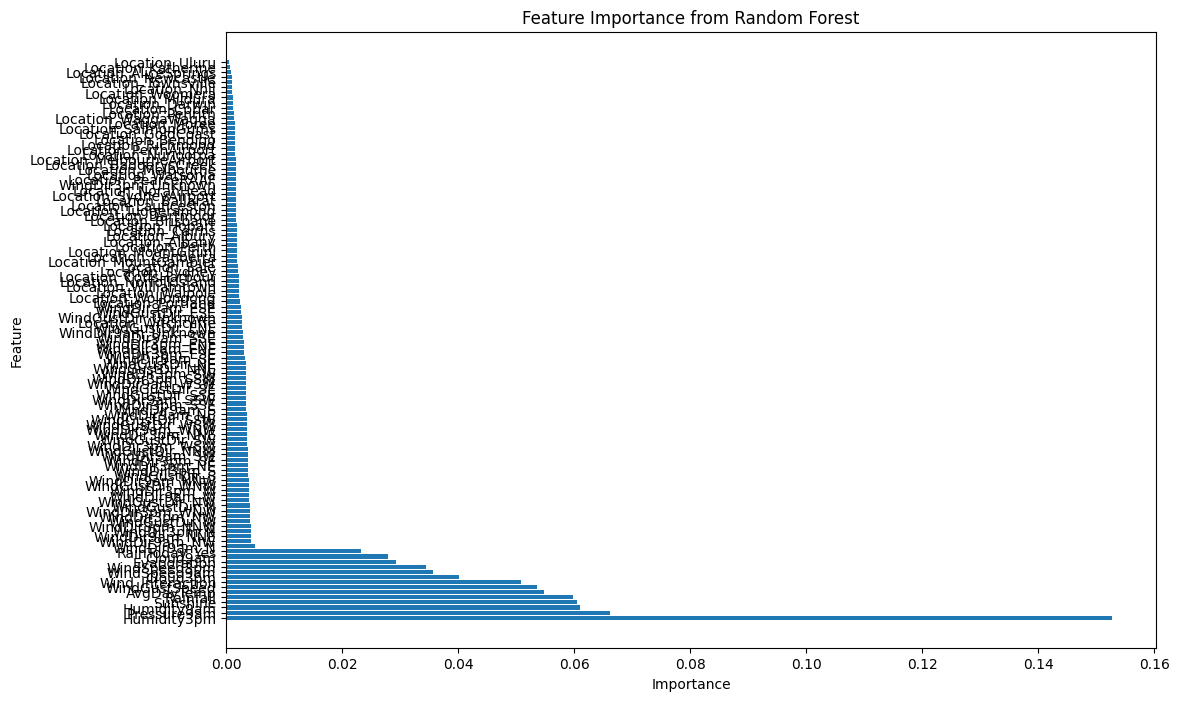

Index(['Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Cloud9am',
       'Cloud3pm', 'AvgDayTemp', 'Wind_Interaction', 'RainToday_Yes'],
      dtype='object')

In [116]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.barh(data_encoded_X.columns[indices], importances[indices])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance from Random Forest")
plt.show()

# Selecting the features with importance greater than 0.01
selected_features = data_encoded_X.columns[importances > 0.01]

selected_features

### Splitting into train and test sets

In [117]:
# Splitting the data into features and target
X = data_encoded[selected_features]
y = data_encoded["RainTomorrow"]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling and normalizing

In [118]:
scaler = StandardScaler()

numerical_columns = X_train.select_dtypes(include=["number"]).columns

X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

## Training the models

### Linear Regression

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     15345
           1       0.72      0.48      0.58      4552

    accuracy                           0.84     19897
   macro avg       0.79      0.71      0.74     19897
weighted avg       0.83      0.84      0.83     19897

Confusion Matrix:
[[14495   850]
 [ 2354  2198]]


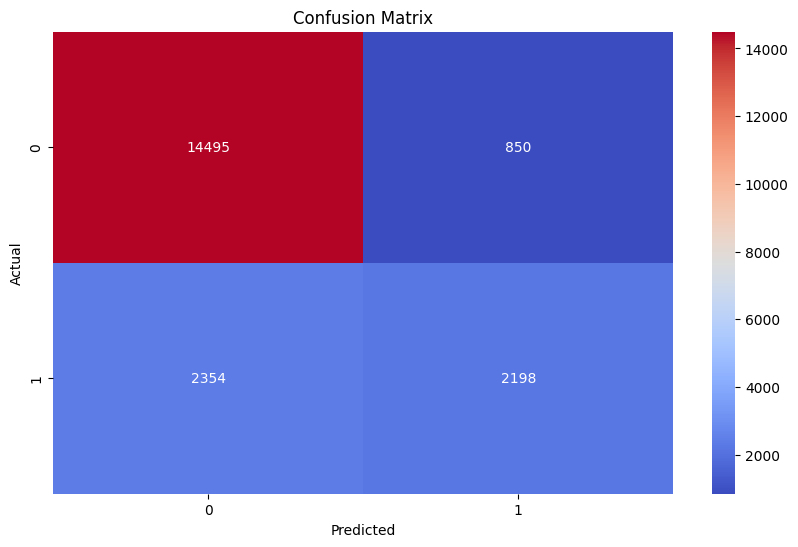

In [ ]:
# Logisitic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="coolwarm", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


#### Using Grid Search

- we saw no improvement with gridsearch CV


35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Ahmed Mohiuddin Shah\AppData\Local\pypoetry\Cache\virtualenvs\machine_learning_labs-LThbZT-V-py3.10\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Ahmed Mohiuddin Shah\AppData\Local\pypoetry\Cache\virtualenvs\machine_learning_labs-LThbZT-V-py3.10\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Ahmed Mohiuddin Shah\AppData\Local\pypoetry\Cache\virtualenvs\machine_learning_labs-LThbZ

Best Parameters: {'C': 1, 'penalty': 'l2'}
Best Score: 0.8394587063626637
Best Estimator: LogisticRegression(C=1)
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     15345
           1       0.72      0.48      0.58      4552

    accuracy                           0.84     19897
   macro avg       0.79      0.71      0.74     19897
weighted avg       0.83      0.84      0.83     19897

Confusion Matrix:
[[14495   850]
 [ 2354  2198]]


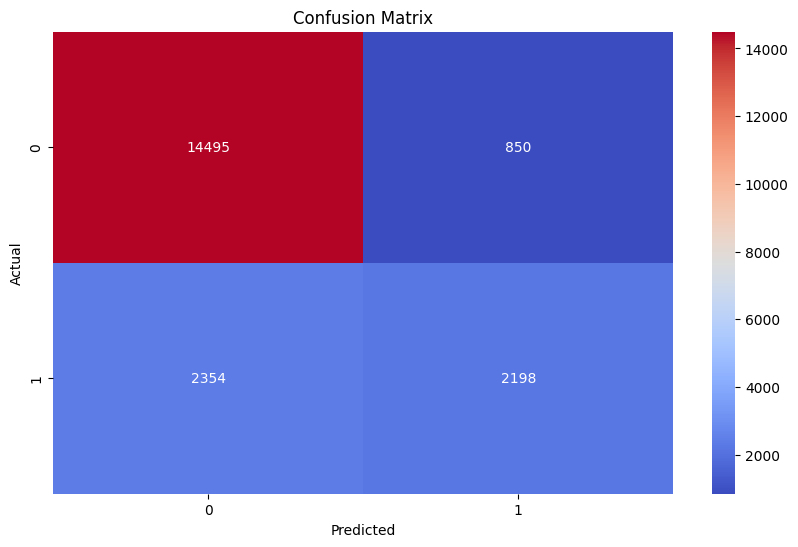

In [125]:
# Grid Search for Hyperparameter Tuning
param_grid = {
    "penalty": ["l1", "l2"],
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
print("Best Estimator:", grid_search.best_estimator_)

# Evaluate the best model
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="coolwarm", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Decision Trees

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85     15345
           1       0.51      0.52      0.51      4552

    accuracy                           0.78     19897
   macro avg       0.68      0.68      0.68     19897
weighted avg       0.78      0.78      0.78     19897

Confusion Matrix:
[[13082  2263]
 [ 2207  2345]]


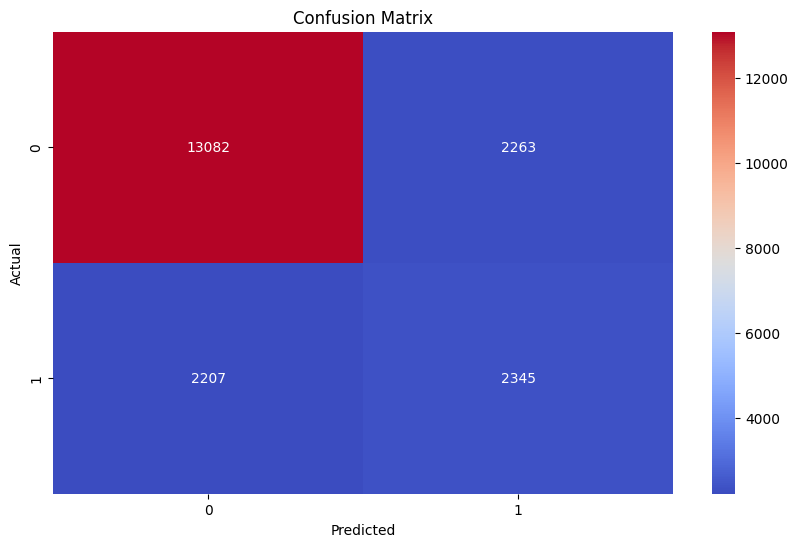

In [121]:
# Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="coolwarm", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### Using Grid Search

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Score: 0.8352997866658193
Best Estimator: DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=10)
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     15345
           1       0.71      0.46      0.56      4552

    accuracy                           0.83     19897
   macro avg       0.78      0.70      0.73     19897
weighted avg       0.82      0.83      0.82     19897

Confusion Matrix:
[[14462   883]
 [ 2440  2112]]


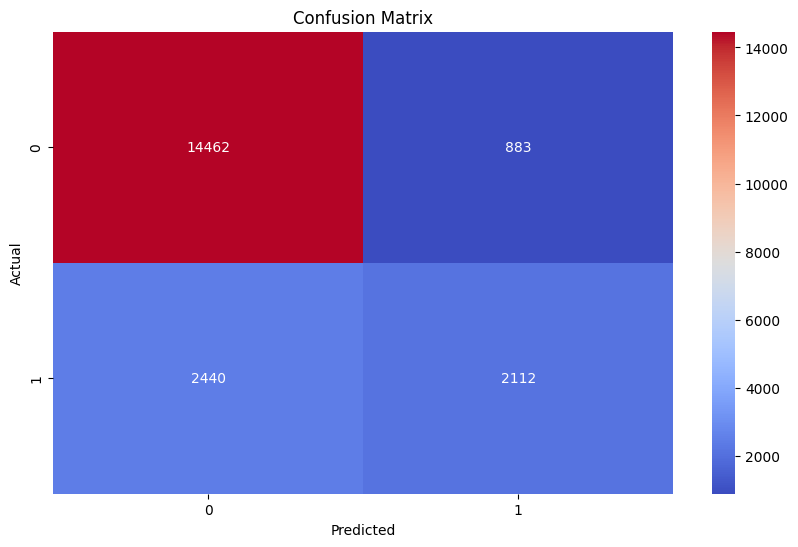

In [126]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
print("Best Estimator:", grid_search.best_estimator_)

# Evaluate the best model
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="coolwarm", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Random Forest Classifier

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.91     15345
           1       0.75      0.49      0.59      4552

    accuracy                           0.85     19897
   macro avg       0.81      0.72      0.75     19897
weighted avg       0.84      0.85      0.83     19897

Confusion Matrix:
[[14619   726]
 [ 2322  2230]]


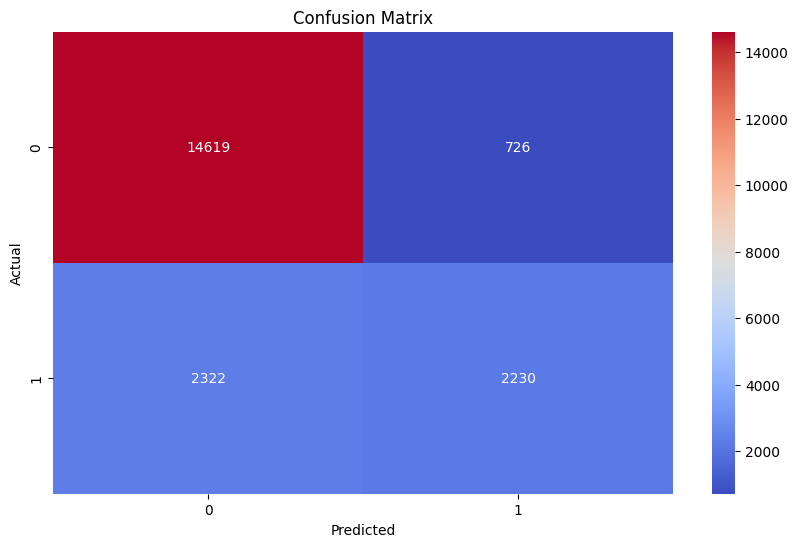

In [122]:
# Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="coolwarm", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### Using Grid Search

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.8490456883290387
Best Estimator: RandomForestClassifier(n_estimators=200)
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.91     15345
           1       0.75      0.49      0.59      4552

    accuracy                           0.85     19897
   macro avg       0.81      0.72      0.75     19897
weighted avg       0.84      0.85      0.83     19897

Confusion Matrix:
[[14616   729]
 [ 2326  2226]]


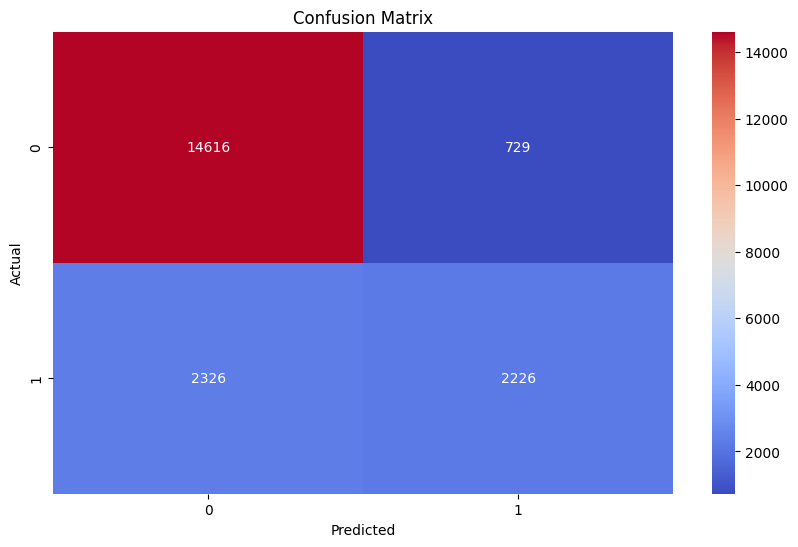

In [127]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
print("Best Estimator:", grid_search.best_estimator_)

# Evaluate the best model
best_model = grid_search.best_estimator_

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="coolwarm", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Bonus

In [128]:
# Create a set of visualizations that help understand the relationship between the selected features and the 
# target variable. Consider using Pairplots or Heatmaps to explore feature importance and correlations. 

# Pairplot for selected features
plt.figure(figsize=(12, 8))
sns.pairplot(data_train[selected_features], hue="RainTomorrow")
plt.title("Pair Plot for Selected Features")
plt.show()

# Heatmap for selected features
plt.figure(figsize=(10, 8))
sns.heatmap(data_train[selected_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Selected Features")
plt.show()

# SHAP values for Random Forest model
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

KeyError: "['RainToday_Yes'] not in index"

<Figure size 1200x800 with 0 Axes>

# Conclusion